# 案例 对半导体数据进行降维处理

In [1]:
import pandas as pd
import numpy as np

In [7]:
dataset=pd.read_csv('secom.data',header=None,sep=' ')

In [8]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [9]:
X=dataset.iloc[:,:].values

In [10]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN', strategy='mean', axis=0)

In [11]:
X_imputer=imputer.fit_transform(X)

In [12]:
X_imputer

array([[  3.03093000e+03,   2.56400000e+03,   2.18773330e+03, ...,
          1.64749042e-02,   5.28333333e-03,   9.96700663e+01],
       [  3.09578000e+03,   2.46514000e+03,   2.23042220e+03, ...,
          2.01000000e-02,   6.00000000e-03,   2.08204500e+02],
       [  2.93261000e+03,   2.55994000e+03,   2.18641110e+03, ...,
          4.84000000e-02,   1.48000000e-02,   8.28602000e+01],
       ..., 
       [  2.97881000e+03,   2.37978000e+03,   2.20630000e+03, ...,
          8.60000000e-03,   2.50000000e-03,   4.35231000e+01],
       [  2.89492000e+03,   2.53201000e+03,   2.17703330e+03, ...,
          2.45000000e-02,   7.50000000e-03,   9.34941000e+01],
       [  2.94492000e+03,   2.45076000e+03,   2.19544440e+03, ...,
          1.62000000e-02,   4.50000000e-03,   1.37784400e+02]])

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
X_pca=pca.fit_transform(X_imputer)

# 案例：pca降维圈图

# 1.构造数据

In [15]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

In [35]:
X

array([[ -1.02754402e+00,   4.22182276e-03],
       [  7.68081238e-02,  -2.77144918e-01],
       [ -7.61502552e-01,  -6.25786098e-01],
       [ -1.84138043e-01,  -2.70629183e-01],
       [  9.17101962e-02,   3.00356279e-01],
       [ -6.50379169e-01,   6.84220872e-01],
       [  1.28091162e-01,   9.67817763e-01],
       [ -2.18250877e-01,   1.97554840e-01],
       [ -1.31611141e-01,   2.71618174e-01],
       [ -2.62461706e-03,  -3.17021579e-01],
       [  6.92165874e-01,   8.19756546e-01],
       [  3.30727707e-01,   3.41571144e-02],
       [ -3.30074116e-01,  -9.84597461e-02],
       [ -9.08962695e-01,  -5.45927030e-01],
       [  4.93278207e-02,  -2.77403464e-01],
       [ -2.11092452e-01,  -2.51424456e-01],
       [  7.82792011e-01,  -5.60047633e-01],
       [  2.81983100e-01,   1.00619186e-02],
       [  2.21757252e-01,  -1.06496037e+00],
       [ -1.02037402e+00,  -1.53151688e-01],
       [  2.34826517e-01,  -2.24929068e-01],
       [ -7.18954502e-01,  -7.73728804e-01],
       [ -

In [18]:
y

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0,

In [24]:
Y=y.reshape((-1,1))
Y

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [31]:
data=np.concatenate((X,Y),axis=1)
data
data.shape

(400, 3)

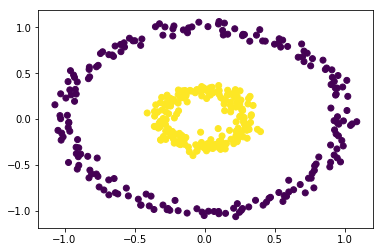

In [32]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1],c=data[:,-1])
plt.show()

# 2.pca

In [37]:
pca=PCA()
X_pca=pca.fit_transform(X)
data_pca=np.concatenate((X_pca,Y),axis=1)
data_pca

array([[-1.01745919, -0.1301806 ,  0.        ],
       [ 0.04399466,  0.28464058,  1.        ],
       [-0.83077738,  0.5277236 ,  0.        ],
       ..., 
       [-0.64815747, -0.80094297,  0.        ],
       [-0.35260451, -0.85428655,  0.        ],
       [ 0.94433465,  0.35274608,  0.        ]])

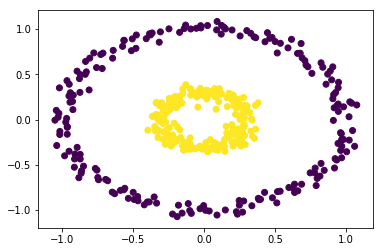

In [39]:
plt.scatter(data_pca[:,0],data_pca[:,1],c=data[:,-1])
plt.show()

# 3.kernel pca

# kernel = 'linear'

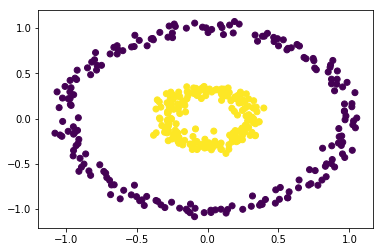

In [53]:
kpca.set_params(kernel='linear',gamma=0.5)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

# kernel = 'rbf'

In [54]:
from sklearn.decomposition  import KernelPCA
kpca=KernelPCA(kernel='rbf',gamma=0.5)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
data_kpca

array([[  6.45308615e-01,   4.63653702e-02,   2.38336817e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -9.13310162e-02,   2.49588438e-01,  -2.29606653e-01, ...,
         -8.39212369e-12,   7.37112541e-12,   1.00000000e+00],
       [  4.62165400e-01,   4.44335814e-01,   2.07527335e-01, ...,
          3.90301233e-11,  -3.24947508e-11,   0.00000000e+00],
       ..., 
       [  4.97921214e-01,  -4.10146947e-01,   2.44004904e-01, ...,
          1.15884083e-11,  -2.18124273e-11,   0.00000000e+00],
       [  3.49644849e-01,  -5.20800766e-01,   1.69983315e-01, ...,
          6.83659521e-12,  -2.61376770e-11,   0.00000000e+00],
       [ -6.35998211e-01,   1.04255431e-01,   2.19753774e-01, ...,
          5.00241403e-11,  -1.05293188e-11,   0.00000000e+00]])

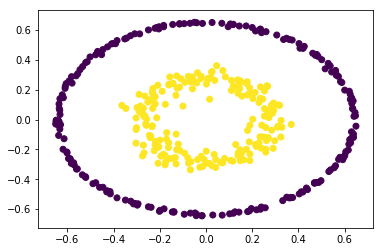

In [55]:
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

# kernel=sigmoid

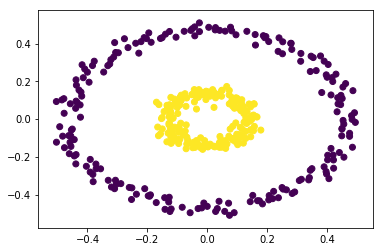

In [56]:
kpca.set_params(kernel='sigmoid',gamma=0.5)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

# kernel='poly'

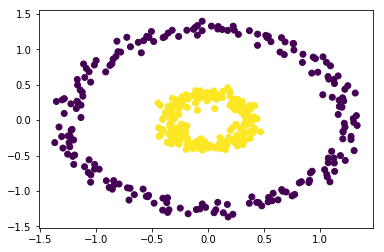

In [57]:
kpca.set_params(kernel='poly',gamma=0.5)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

# kernel='cosine'

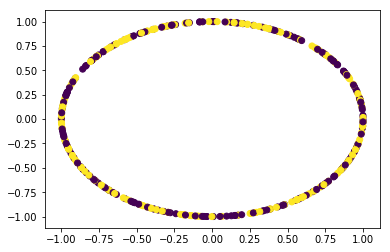

In [58]:
kpca.set_params(kernel='cosine',gamma=0.5)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

# 2.change gamma

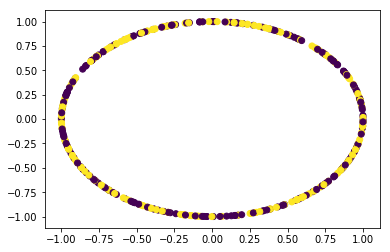

In [60]:
kpca.set_params(kernel='cosine',gamma=1)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

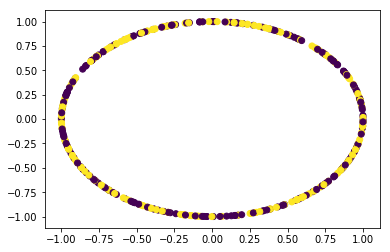

In [61]:
kpca.set_params(kernel='cosine',gamma=5)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

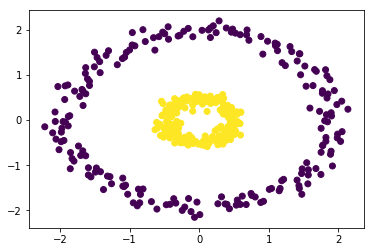

In [63]:
kpca.set_params(kernel='poly',gamma=1)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

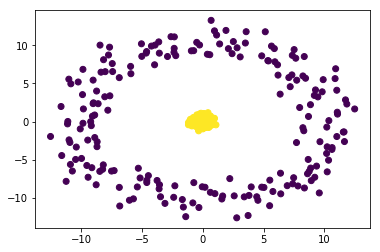

In [64]:
kpca.set_params(kernel='poly',gamma=5)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

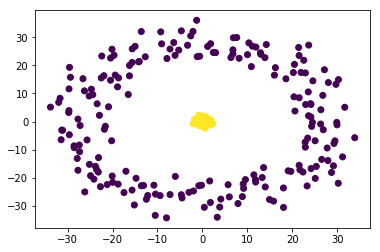

In [65]:
kpca.set_params(kernel='poly',gamma=10)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

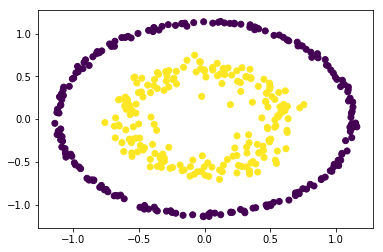

In [66]:
kpca.set_params(kernel='sigmoid',gamma=5)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

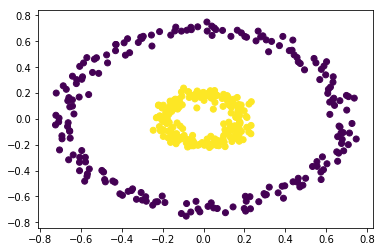

In [67]:
kpca.set_params(kernel='sigmoid',gamma=1)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

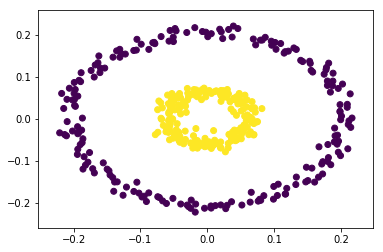

In [68]:
kpca.set_params(kernel='sigmoid',gamma=0.1)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

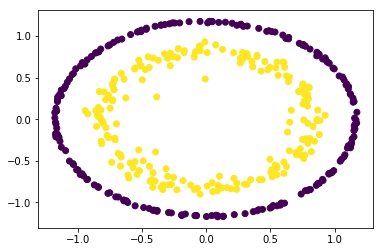

In [69]:
kpca.set_params(kernel='sigmoid',gamma=10)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

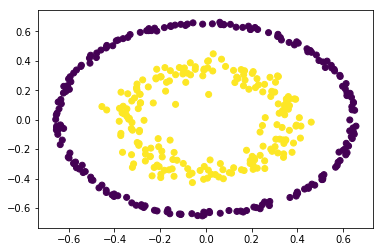

In [70]:
kpca.set_params(kernel='rbf',gamma=1)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

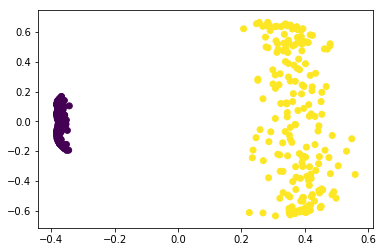

In [72]:
kpca.set_params(kernel='rbf',gamma=5)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()

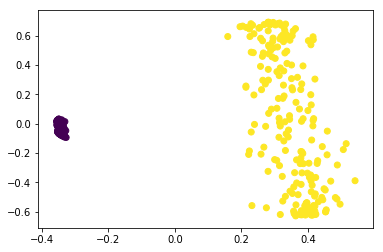

In [81]:
kpca.set_params(kernel='rbf',gamma=7)
X_kpca=kpca.fit_transform(X)
data_kpca=np.concatenate((X_kpca,Y),axis=1)
plt.scatter(data_kpca[:,0],data_kpca[:,1],c=data[:,-1])
plt.show()